## Response和Signaling的散点图

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

celltype = 'NK'
sample = 'AML_GSE116256'

if celltype == 'CD8T':
    signature = 'Proliferation'
    celltype_in_column = 'CD8T'
    celltype_in_file = 'CD8T'
    response_path = f'/sibcb2/bioinformatics2/hongyuyang/dataset/Tres/2.tisch_data/3-1.Proliferation/{sample}.csv'
elif celltype == 'Macrophage':
    signature = 'SMART_C13'
    celltype_in_column = 'Mono/Macro'
    celltype_in_file = 'Mono_Macro'
    response_path = f'/sibcb2/bioinformatics2/hongyuyang/dataset/Tres/2.tisch_data/3-2.Polarization/{sample}.csv'
elif celltype == 'Neutrophils':
    # signature = 'Neutrophils_signature'
    signature = 'Neut_IFN-15'
    celltype_in_column = 'Neutrophils'
    celltype_in_file = 'Neutrophils'
    # response_path = f'/sibcb2/bioinformatics2/hongyuyang/dataset/Tres/2.tisch_data/3-3.Neutrophils_response/{sample}.csv'
    response_path = f'/sibcb2/bioinformatics2/hongyuyang/dataset/Tres/2.neutrophil_data/Gao2024.response.csv'
elif celltype == 'NK':
    signature = 'NK_signature'
    celltype_in_column = 'NK'
    celltype_in_file = 'NK'
    response_path = f'/sibcb2/bioinformatics2/hongyuyang/dataset/Tres/2.tisch_data/3-4.NK_response/{sample}.csv'
    
signaling_path = f'/sibcb2/bioinformatics2/hongyuyang/dataset/Tres/2.tisch_data/2.Signaling/{sample}.csv'
# signaling_path = '/sibcb2/bioinformatics2/hongyuyang/dataset/Tres/2.neutrophil_data/Gao2024.signaling.csv'
signaling_data = pd.read_csv(signaling_path, delimiter='\t', index_col=0, header=0)
celltype_list = [v.split('.')[0] for v in signaling_data.columns]
filter_flag = [v for v in signaling_data.columns if v.split('.')[0] == celltype_in_column]
signaling_data = signaling_data[filter_flag]

response_data = pd.read_csv(response_path, delimiter='\t', index_col=0, header=0)

signaling_data.shape, response_data.shape

((51, 1738), (2, 1738))

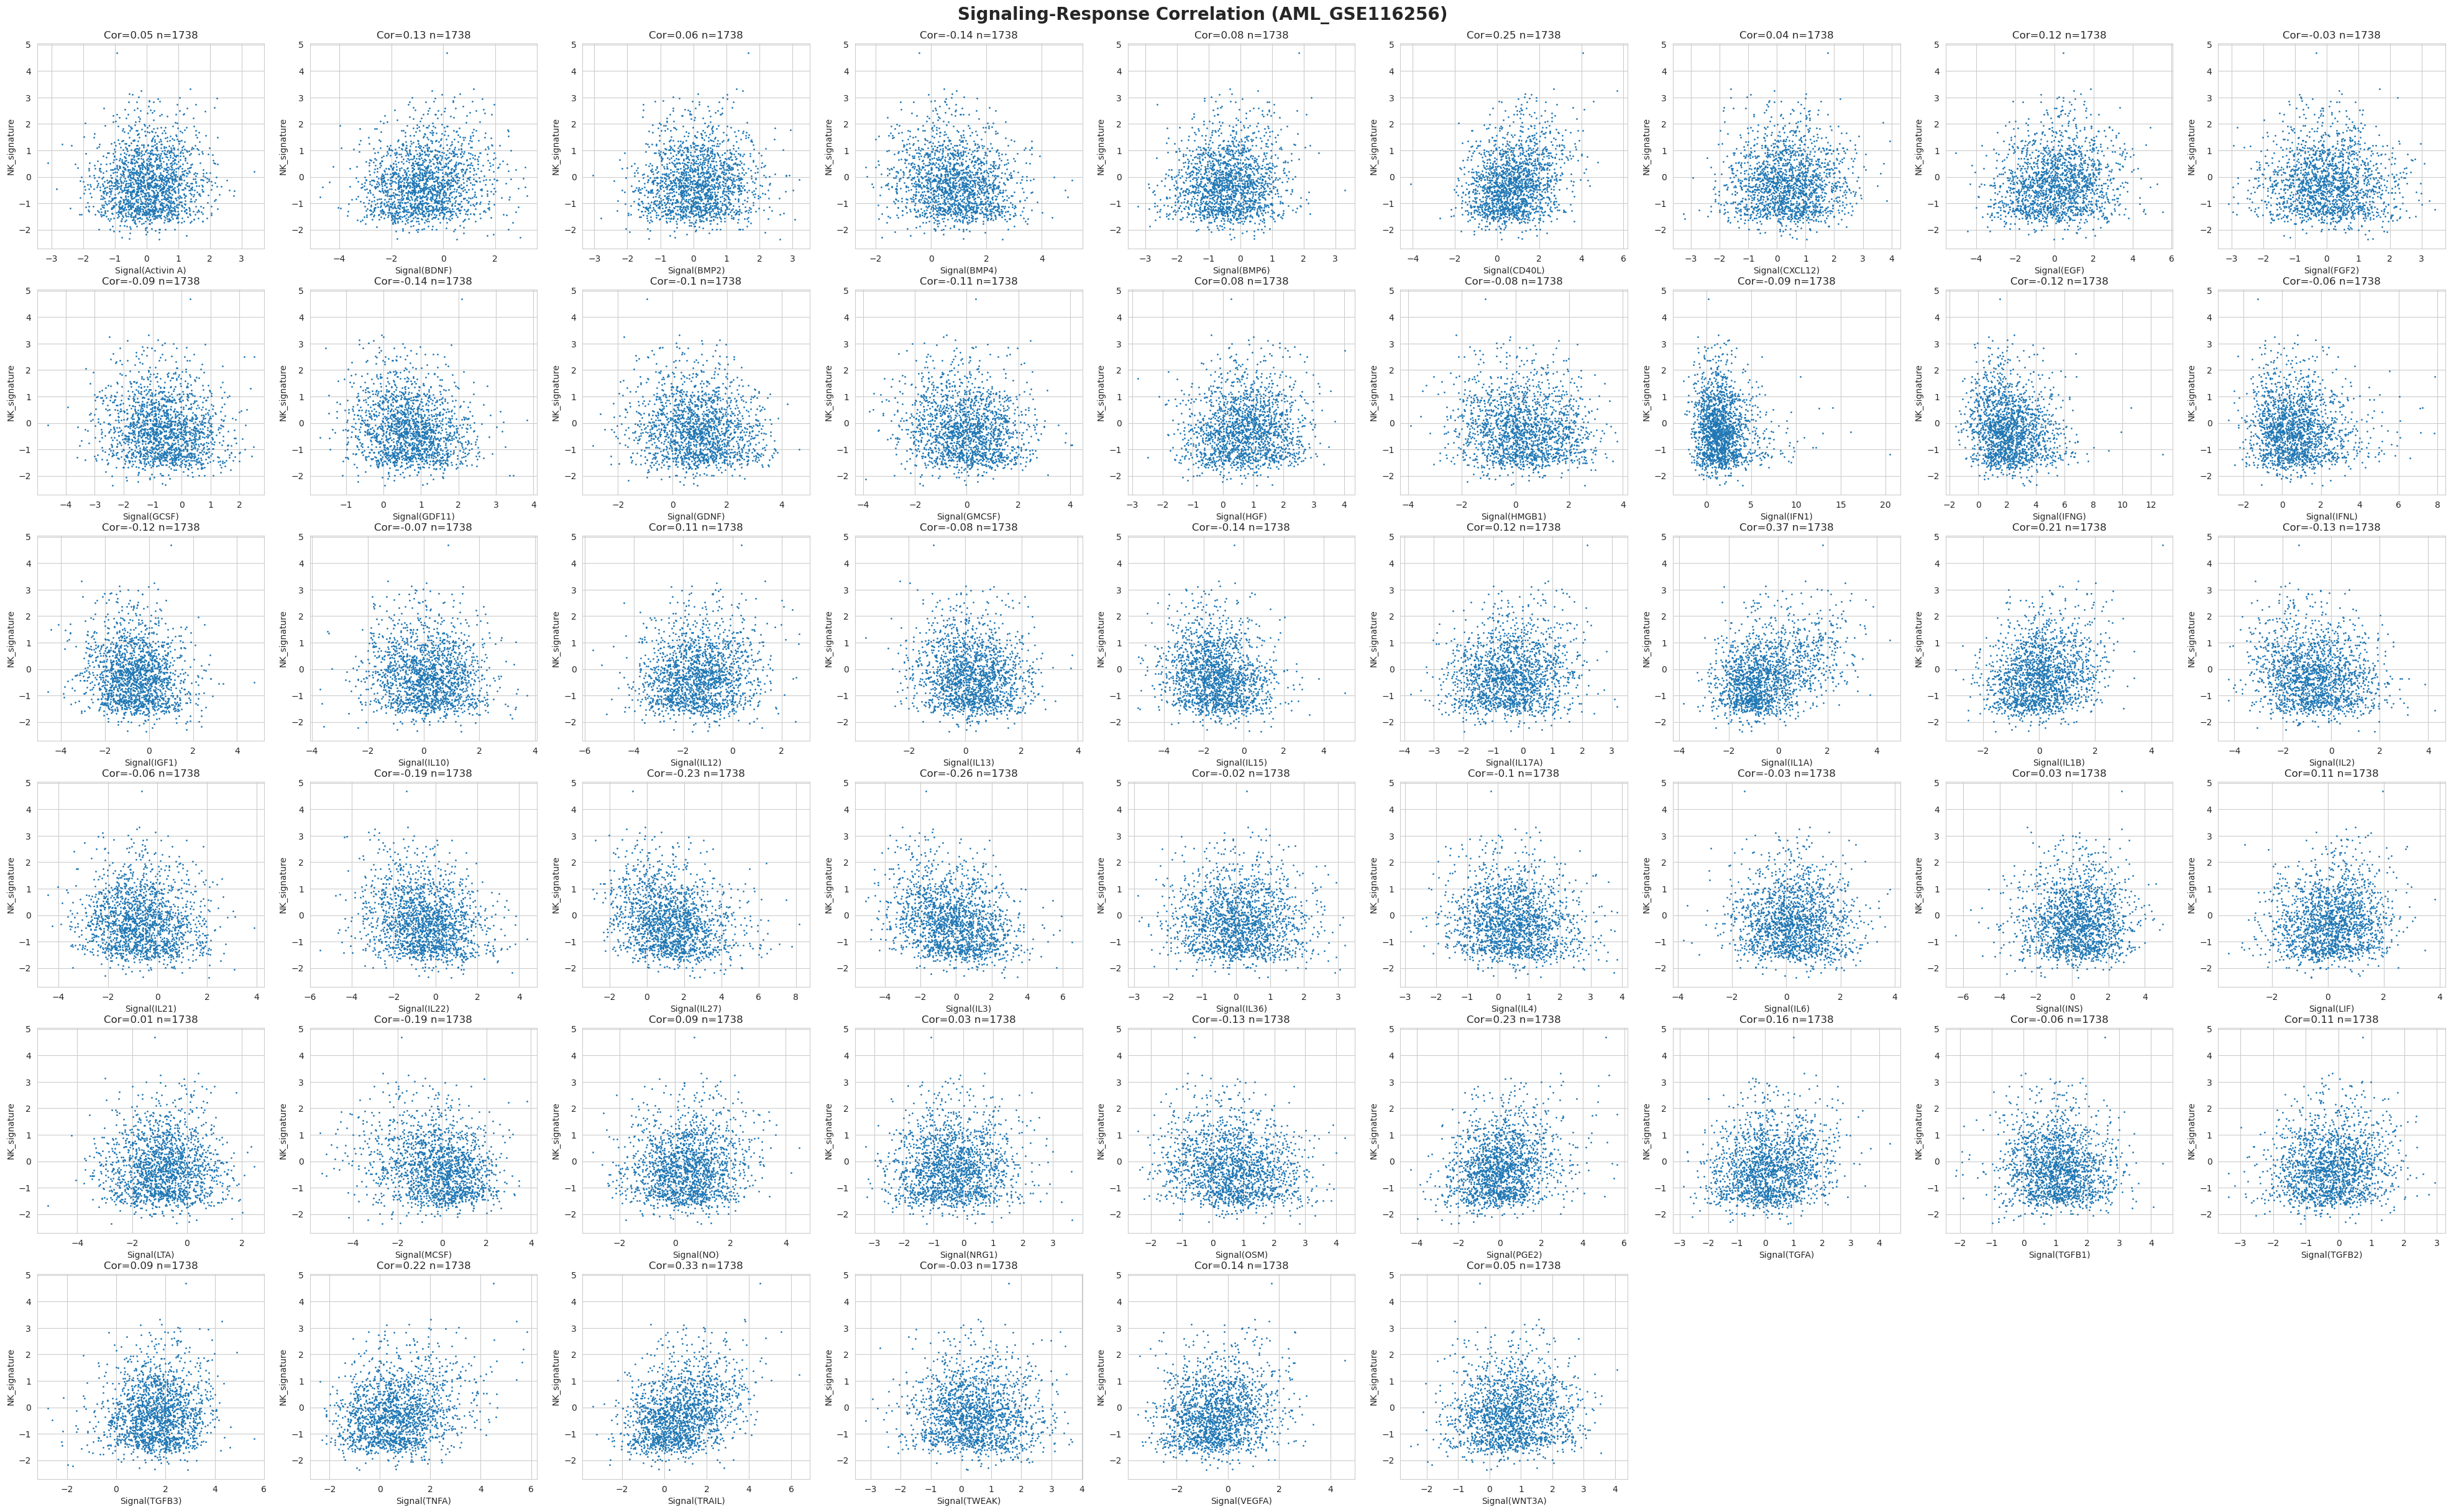

In [12]:
import matplotlib.gridspec as gridspec
from scipy.stats import pearsonr

fig = plt.figure(figsize=(50, 30))
ncols, nrows = 9, 6
gs = gridspec.GridSpec(nrows=nrows, ncols=ncols, width_ratios=[1] * ncols, height_ratios=[1] * nrows)

y = response_data.loc[signature]
i = 0
for cytokine in list(signaling_data.index):
    col = i % ncols
    row = int(i / ncols)
    ax = fig.add_subplot(gs[row, col])

    x = signaling_data.loc[cytokine]
    
    # x_normalized = (x - min(x)) / (max(x) - min(x))
    # y_normalized = (y - min(y)) / (max(y) - min(y))
    correlation, _ = pearsonr(x, y)
    
    ax.scatter(x, y, s=1)
    ax.set_xlabel(f'Signal({cytokine})')
    ax.set_ylabel(signature)
    ax.set_title(f'Cor={round(correlation, 2)} n={len(x)}')
    i += 1
fig.suptitle(f"Signaling-Response Correlation ({sample})", fontsize=20, fontweight='bold', y=0.9)
plt.show()

## Response和Signaling相关性系数总结

/var/tmp/ipykernel_205198/3529539241.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  histplot.set_yticklabels(histplot.get_yticks(), size = 15)


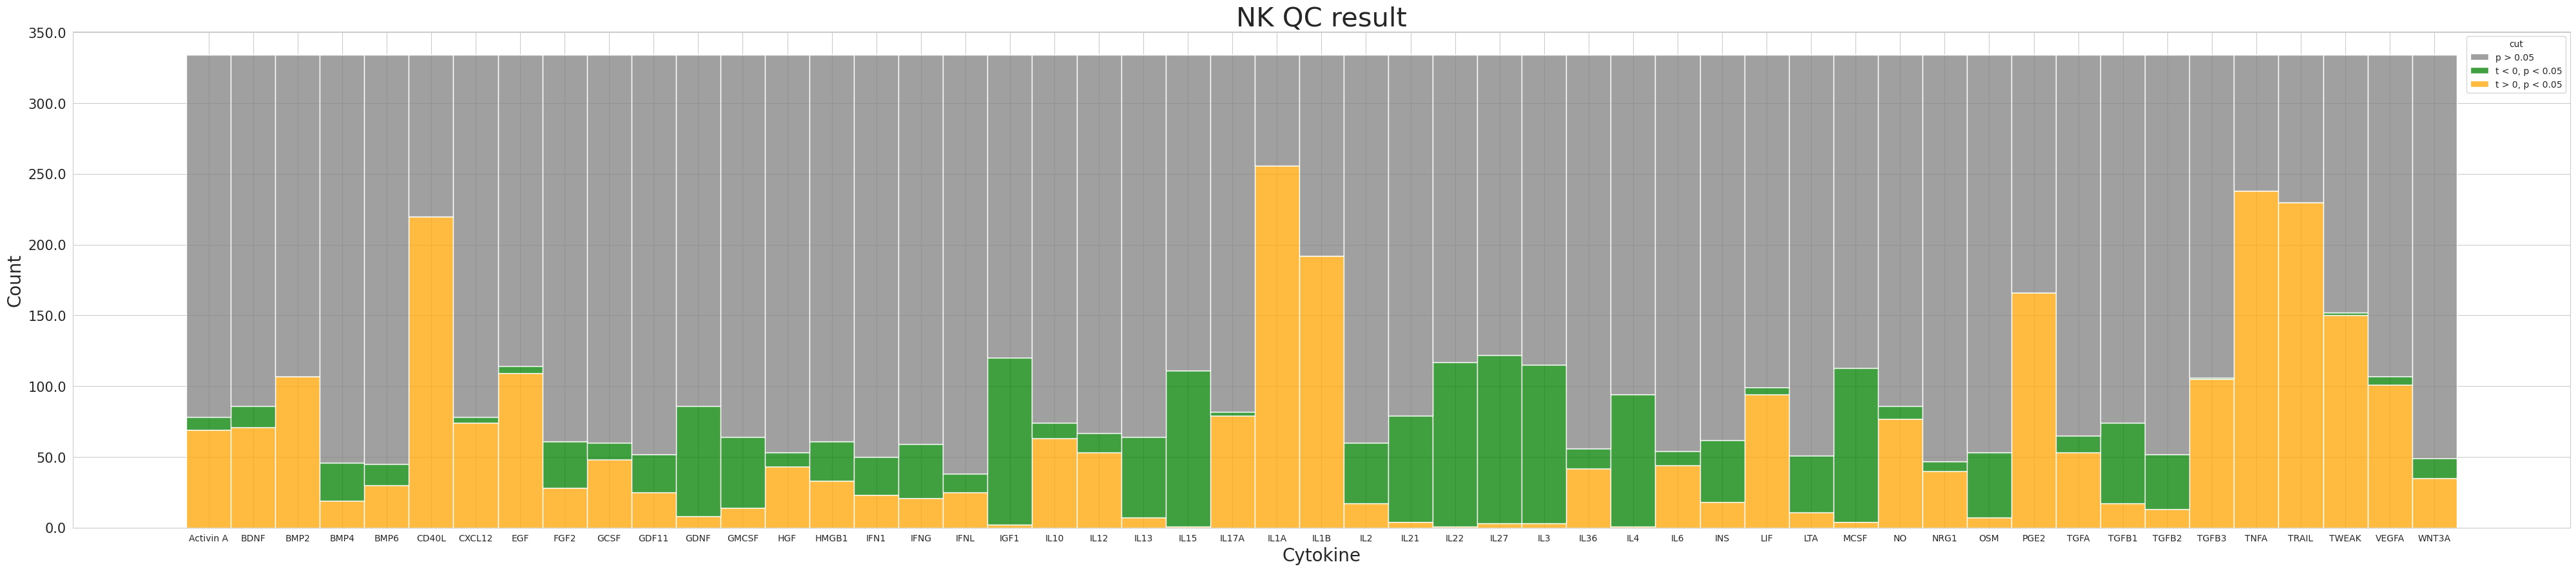

In [4]:
import matplotlib.gridspec as gridspec

# celltype_list = ['CD8T', 'Macrophage', 'Neutrophils', 'NK']
celltype_list = ['NK']
fig = plt.figure(figsize=(50, 10 * len(celltype_list)))
gs = gridspec.GridSpec(nrows=len(celltype_list), ncols=1)

i = 0
for celltype in celltype_list:
    if celltype == 'Neutrophils':
        qc_result_path = '/sibcb2/bioinformatics2/hongyuyang/dataset/Tres/2.neutrophil_data/qc_result.Neutrophils.csv'
    else:
        qc_result_path = f'/sibcb2/bioinformatics2/hongyuyang/dataset/Tres/2.tisch_data/4.qc_result/qc_result.{celltype}.csv'
    qc_result_data = pd.read_csv(qc_result_path, sep="\t", header=0)
    
    def get_group(x):
        if x.t >= 0 and x.p <= 0.05:
            return "t > 0, p < 0.05"
        elif x.t <= 0 and x.p <= 0.05:
            return "t < 0, p < 0.05"
        elif x.p > 0.05:
            return "p > 0.05"
    qc_result_data['cut'] = qc_result_data.apply(lambda x: get_group(x), axis=1)
    
    ax = fig.add_subplot(gs[i, 0])
    histplot = sns.histplot(data=qc_result_data, x="Cytokine", hue="cut", multiple="stack", 
                            palette={'t > 0, p < 0.05':'orange', 't < 0, p < 0.05':'green', 'p > 0.05':'grey'})
    histplot.xaxis.label.set_size(20)
    histplot.yaxis.label.set_size(20)
    histplot.set_yticklabels(histplot.get_yticks(), size = 15)
    histplot.set_title(f"{celltype} QC result", size = 30)
    i += 1
plt.show()

/var/tmp/ipykernel_205198/1194478470.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  histplot.set_yticklabels(histplot.get_yticks(), size = 15)


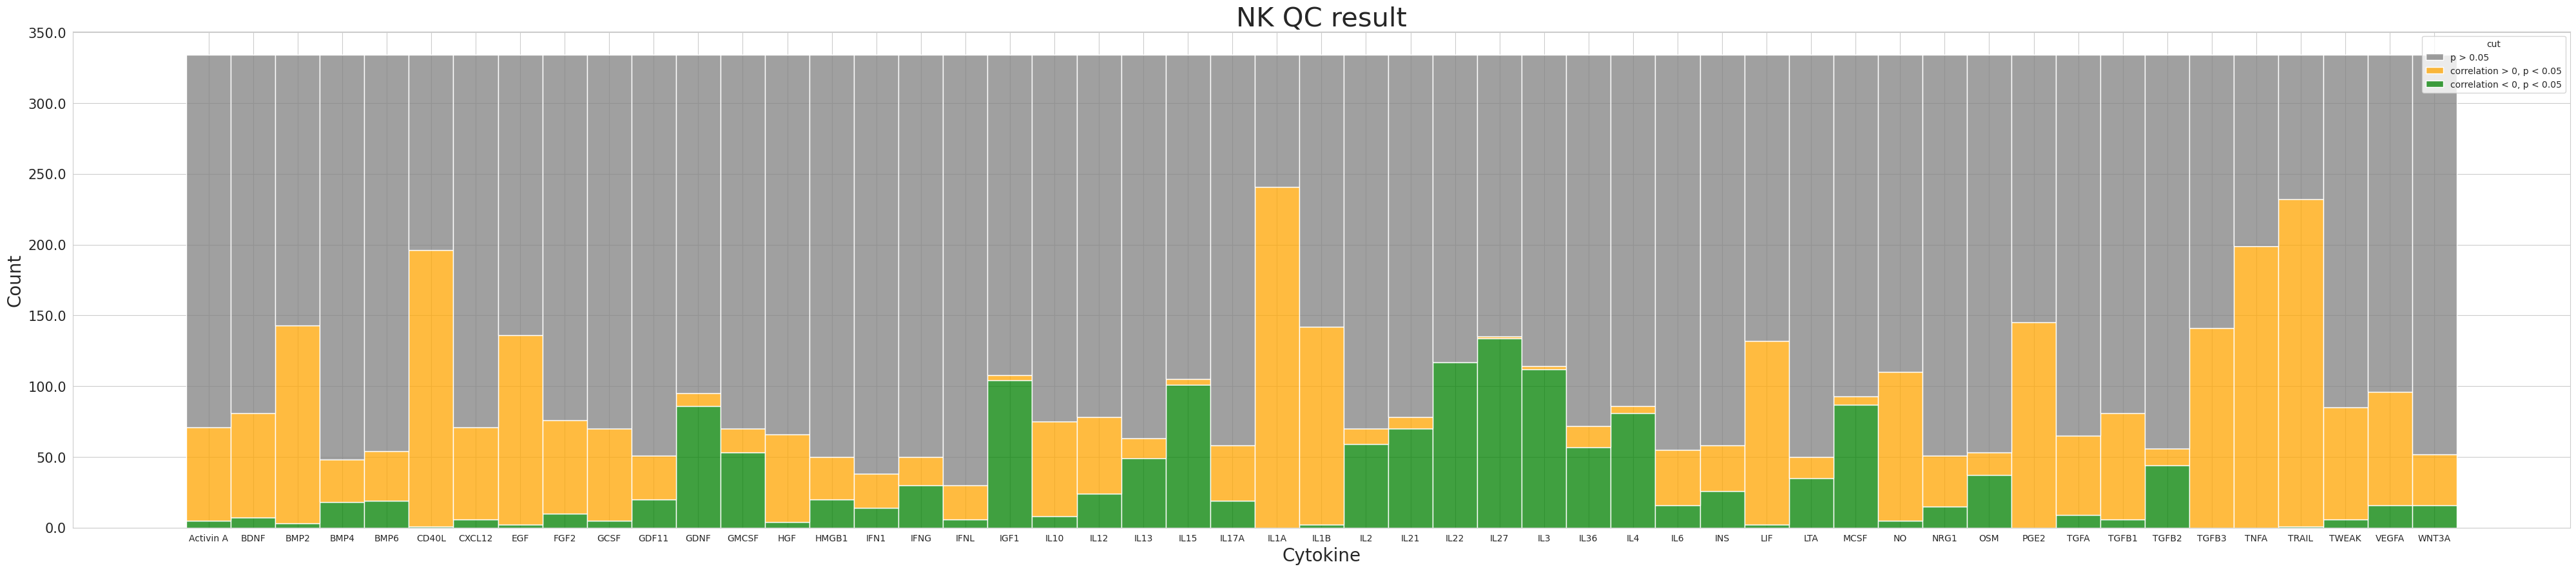

In [15]:
import matplotlib.gridspec as gridspec

celltype_list = ['CD8T', 'Macrophage', 'Neutrophils', 'NK']
# celltype_list = ['NK']
fig = plt.figure(figsize=(50, 10 * len(celltype_list)))
gs = gridspec.GridSpec(nrows=len(celltype_list), ncols=1)

i = 0
for celltype in celltype_list:
    if celltype == 'Neutrophils':
        qc_result_path = '/sibcb2/bioinformatics2/hongyuyang/dataset/Tres/2.neutrophil_data/qc_result.Neutrophils.csv'
    else:
        qc_result_path = f'/sibcb2/bioinformatics2/hongyuyang/dataset/Tres/2.tisch_data/4.qc_result/qc_result_correlation.{celltype}.csv'
    qc_result_data = pd.read_csv(qc_result_path, sep="\t", header=0)
    
    def get_group(x):
        if x.correlation >= 0 and x.p <= 0.05:
            return "correlation > 0, p < 0.05"
        elif x.correlation <= 0 and x.p <= 0.05:
            return "correlation < 0, p < 0.05"
        elif x.p > 0.05:
            return "p > 0.05"
    qc_result_data['cut'] = qc_result_data.apply(lambda x: get_group(x), axis=1)
    
    def get_group2(x):
        if x.correlation >= 0 and x.p <= 0.05:
            return 0
        elif x.correlation <= 0 and x.p <= 0.05:
            return 1
        elif x.p > 0.05:
            return -1

    qc_result_data['negative_rate'] = qc_result_data.apply(lambda x: get_group2(x), axis=1)
    qc_result_filtered = qc_result_data[qc_result_data['negative_rate'] >= 0]
    negative_rate = qc_result_filtered.groupby('Cytokine')['negative_rate'].mean()
    negative_rate.sort_values(ascending=False, inplace=True)
    negative_rate.to_csv(f"/sibcb2/bioinformatics2/hongyuyang/dataset/Tres/2.tisch_data/4.qc_result/Rank_new.{celltype}.csv")
    
    ax = fig.add_subplot(gs[i, 0])
    histplot = sns.histplot(data=qc_result_data, x="Cytokine", hue="cut", multiple="stack", 
                            palette={'correlation > 0, p < 0.05':'orange', 'correlation < 0, p < 0.05':'green', 'p > 0.05':'grey'})
    histplot.xaxis.label.set_size(20)
    histplot.yaxis.label.set_size(20)
    histplot.set_yticklabels(histplot.get_yticks(), size = 15)
    histplot.set_title(f"{celltype} QC result", size = 30)
    i += 1
plt.show()

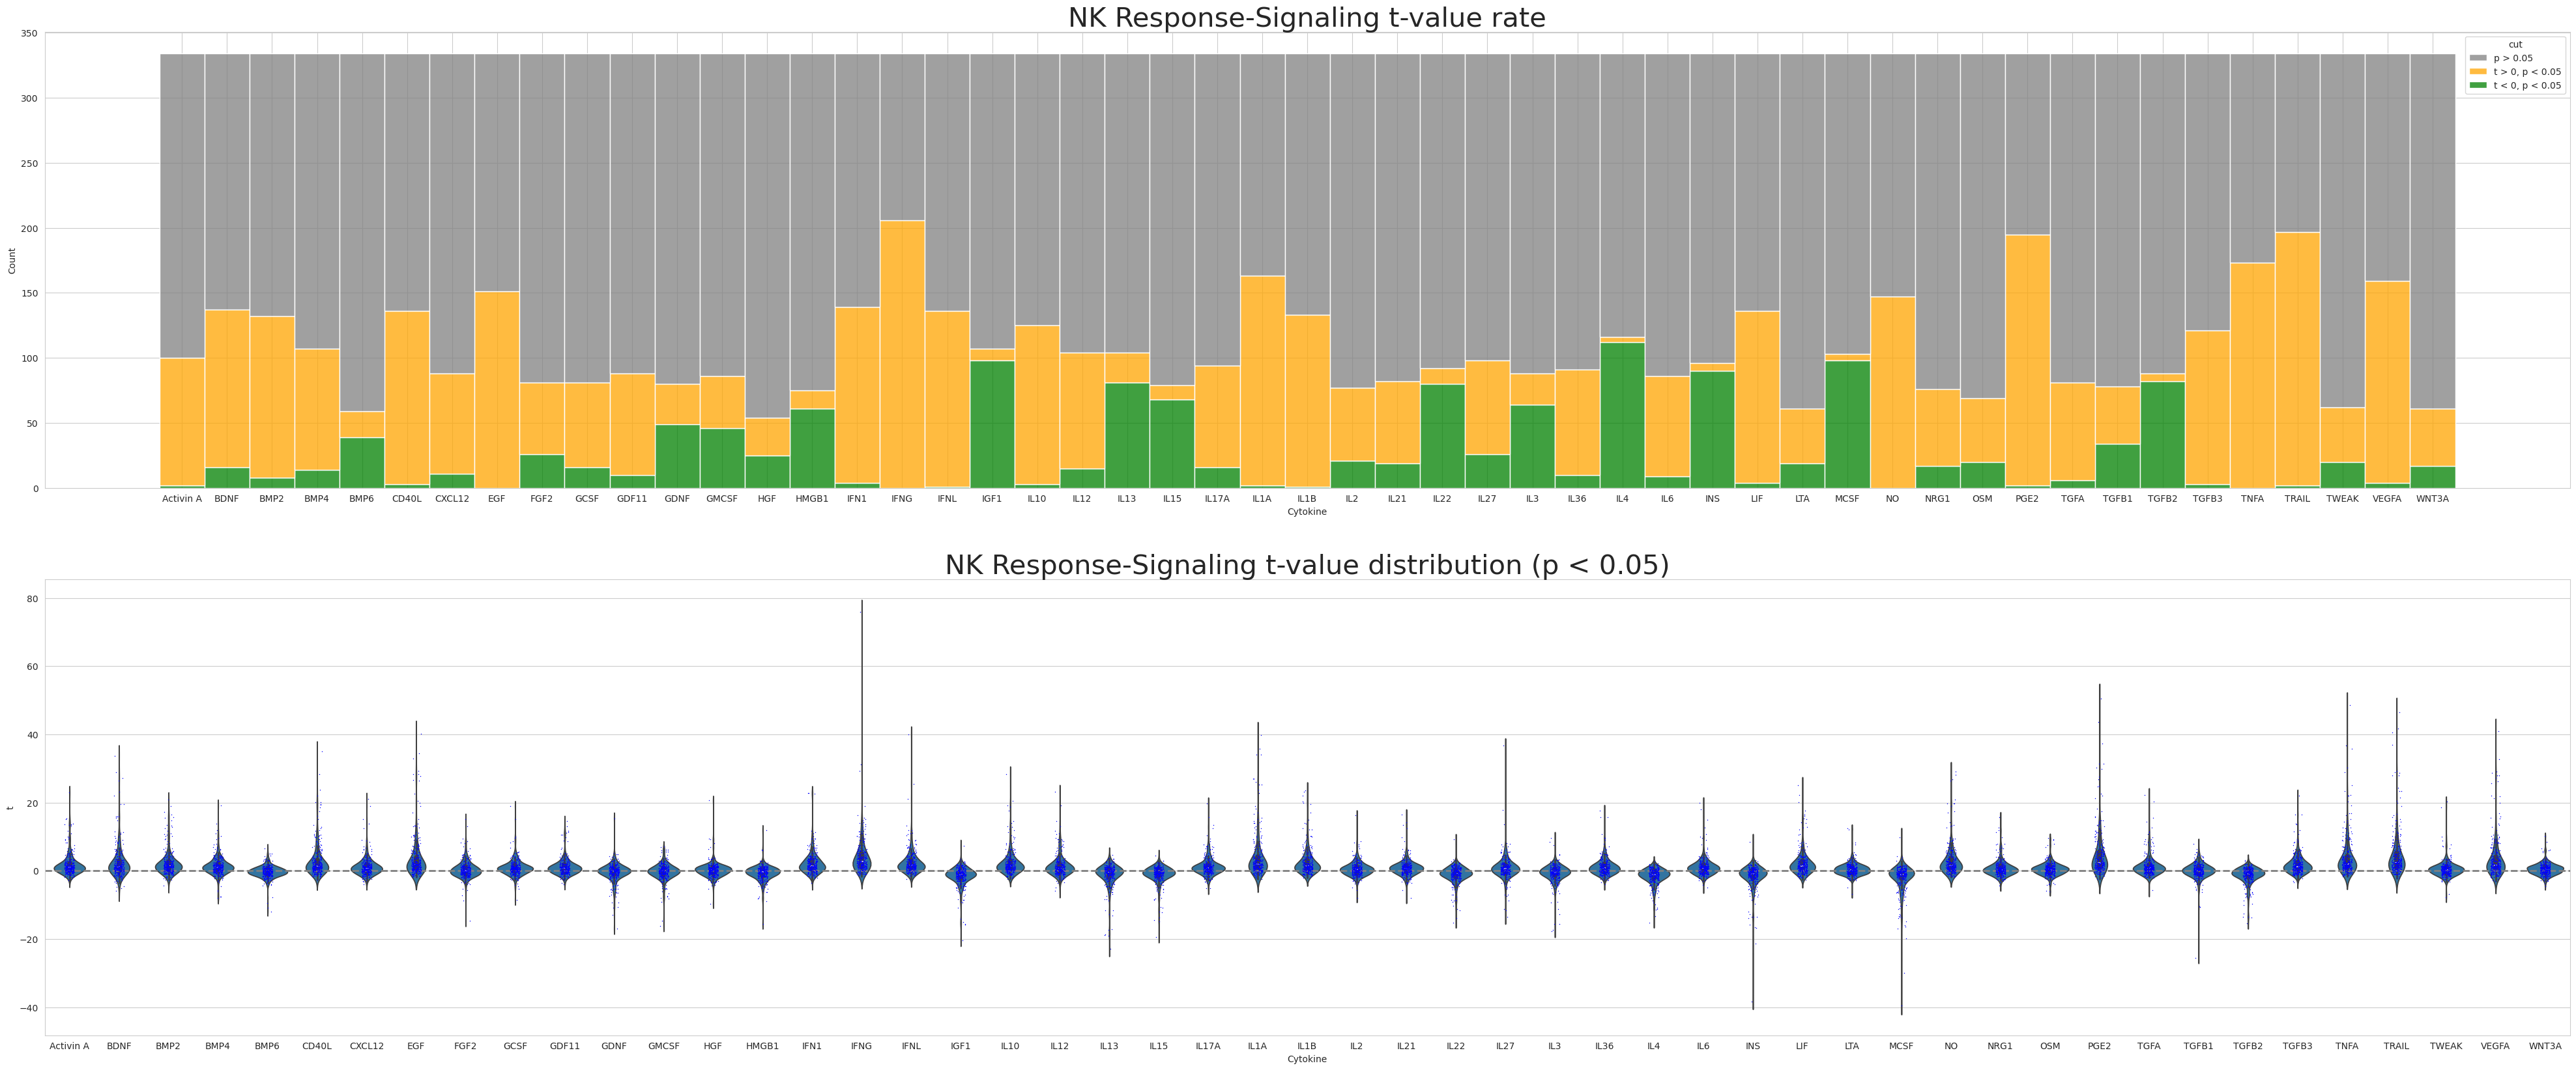

In [31]:
# 加上散点图
fig, axes = plt.subplots(2, 1, figsize=(50, 20))
sns.histplot(data=qc_result_data, x="Cytokine", hue="cut", multiple="stack", ax=axes[0], 
            palette={'t > 0, p < 0.05':'orange', 't < 0, p < 0.05':'green', 'p > 0.05':'grey'})
axes[0].set_title(f"{celltype} Response-Signaling t-value rate", size=30)
# qc_result_data_filtered = qc_result_data[qc_result_data['p'] <= 0.05]
sns.violinplot(x="Cytokine", y="t", data=qc_result_data, ax=axes[1])
sns.stripplot(x="Cytokine", y="t", data=qc_result_data, color='b', size=1, ax=axes[1])
axes[1].axhline(0, color='grey', linestyle='--', linewidth=2)
axes[1].set_title(f"{celltype} Response-Signaling t-value distribution (p < 0.05)", size=30)
plt.show()

## Cytokine相关性小于0占比排序

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy

celltype = 'CD8T'
qc_result_path1 = '/sibcb2/bioinformatics2/hongyuyang/dataset/Tres/1.paper_data/3.qc_result/qc_result.CD8T.csv'
qc_result_path2 = '/sibcb2/bioinformatics2/hongyuyang/dataset/Tres/2.tisch_data/4.qc_result/qc_result.CD8T.csv'
qc_result_data1 = pd.read_csv(qc_result_path1, sep="\t", header=0)
qc_result_data2 = pd.read_csv(qc_result_path2, sep="\t", header=0)

def get_group(x):
    if x.t >= 0 and x.p <= 0.05:
        return 0
    elif x.t <= 0 and x.p <= 0.05:
        return 1
    elif x.p > 0.05:
        return -1

qc_result_data1['cut'] = qc_result_data1.apply(lambda x: get_group(x), axis=1)
qc_result_data2['cut'] = qc_result_data2.apply(lambda x: get_group(x), axis=1)
qc_result_filtered1 = qc_result_data1[qc_result_data1['cut'] >= 0]
qc_result_filtered2 = qc_result_data2[qc_result_data2['cut'] >= 0]

qc_result_groupby_Cytokine1 = qc_result_filtered1.groupby('Cytokine')
qc_result_groupby_Cytokine2 = qc_result_filtered2.groupby('Cytokine')

cut_mean1 = qc_result_groupby_Cytokine1['cut'].mean()
cut_mean2 = qc_result_groupby_Cytokine2['cut'].mean()

X = cut_mean1.values
Y = cut_mean2.values
label = cut_mean1.index

# save the t<0 rate rank
rank_table = pd.DataFrame(index=label, columns=['Cohort_rank', 'Tisch_rank', 'average'])
Cohort_rank = scipy.stats.rankdata(X, method='min')
Tisch_rank = scipy.stats.rankdata(Y, method='min')
average = (Cohort_rank + Tisch_rank) / 2
rank_table['Cohort_rank'] = Cohort_rank
rank_table['Tisch_rank'] = Tisch_rank
rank_table['average'] = average
rank_table_sort = rank_table.sort_values(by='average')
rank_table_sort.to_csv(f"/sibcb2/bioinformatics2/hongyuyang/dataset/Tres/2.tisch_data/4.qc_result/Rank.{celltype}.csv")

fig = plt.figure(figsize=(10, 10))
plt.scatter(X, Y)
for i in range(len(X)):
    plt.annotate(label[i], xy = (X[i], Y[i]), xytext = (X[i], Y[i]), fontsize = 5)
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.title('Cohort_Tisch Cytokine t<0 rate')
plt.xlabel('Cohort')
plt.ylabel('Tisch')
plt.show()

In [3]:
celltype = 'NK'
qc_result_path = f'/sibcb2/bioinformatics2/hongyuyang/dataset/Tres/2.tisch_data/4.qc_result/qc_result.{celltype}.csv'
# qc_result_path = '/sibcb2/bioinformatics2/hongyuyang/dataset/Tres/2.neutrophil_data/qc_result.Neutrophils.csv'
qc_result_data = pd.read_csv(qc_result_path, sep="\t", header=0)

def get_group(x):
    if x.t >= 0 and x.p <= 0.05:
        return 0
    elif x.t <= 0 and x.p <= 0.05:
        return 1
    elif x.p > 0.05:
        return -1

qc_result_data['negative_rate'] = qc_result_data.apply(lambda x: get_group(x), axis=1)
qc_result_filtered = qc_result_data[qc_result_data['negative_rate'] >= 0]
negative_rate = qc_result_filtered.groupby('Cytokine')['negative_rate'].mean()
negative_rate.sort_values(ascending=False, inplace=True)
# negative_rate.to_csv(f"/sibcb2/bioinformatics2/hongyuyang/dataset/Tres/2.neutrophil_data/Rank.{celltype}.csv")
negative_rate.to_csv(f"/sibcb2/bioinformatics2/hongyuyang/dataset/Tres/2.tisch_data/4.qc_result/Rank.{celltype}.csv")
negative_rate

Cytokine
IL22         0.991453
IL15         0.990991
IL4          0.989362
IGF1         0.983333
IL27         0.975410
IL3          0.973913
MCSF         0.964602
IL21         0.949367
GDNF         0.906977
IL13         0.890625
OSM          0.867925
LTA          0.784314
GMCSF        0.781250
TGFB1        0.770270
TGFB2        0.750000
IL2          0.716667
INS          0.709677
IFNG         0.644068
BMP4         0.586957
FGF2         0.540984
IFN1         0.540000
GDF11        0.519231
HMGB1        0.459016
IFNL         0.342105
BMP6         0.333333
WNT3A        0.285714
IL36         0.250000
IL12         0.208955
GCSF         0.200000
HGF          0.188679
IL6          0.185185
TGFA         0.184615
BDNF         0.174419
NRG1         0.148936
IL10         0.148649
Activin A    0.115385
NO           0.104651
VEGFA        0.056075
CXCL12       0.051282
LIF          0.050505
EGF          0.043860
IL17A        0.036585
TWEAK        0.013158
TGFB3        0.009434
BMP2         0.000000
C